In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("ecommerce.csv")
data

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10994,10995,A,Ship,4,1,252,5,medium,F,1,1538,1
10995,10996,B,Ship,4,1,232,5,medium,F,6,1247,0
10996,10997,C,Ship,5,4,242,5,low,F,4,1155,0
10997,10998,F,Ship,5,2,223,6,medium,M,2,1210,0


### Target, NonTarget Define

In [3]:
target_feature = 'Reached.on.Time_Y.N' # resulting target
target_range = [0,1] # range of target, socre 0 ~ 1
other_feature = ['Warehouse_block', 
                'Mode_of_Shipment',
                'Customer_care_calls',
                'Customer_rating',
                'Cost_of_the_Product',
                'Prior_purchases',
                'Product_importance',
                'Gender',
                'Discount_offered',
                'Weight_in_gms'
                 ]

### Drop Outlier

In [4]:
# def : drop outlier algorithms
# Input : feature of dataframe
# return : index of outlier, type numpy array 
def IQR(data) :
    q1 = np.percentile(data, 25) # percentile : what is the value on 25 percent
    q3 = np.percentile(data, 75)
    iqr = q3 - q1
    low_outlier = q1 - (iqr*1.5)
    high_outlier = q3 + (iqr*1.5)
    index = np.where((data > high_outlier) | (data < low_outlier))
    print('IQR : ', iqr)
    print('Low outlier : ' , low_outlier)
    print('High outlier : ', high_outlier)
    
    return index

In [5]:
# find outlier of discount offered
Discount_offered_outlier_index = IQR(data['Discount_offered'])[0] # [0] is important
Discount_offered_outlier_index

IQR :  6.0
Low outlier :  -5.0
High outlier :  19.0


array([   0,    1,    2, ..., 3131, 3132, 3133], dtype=int64)

In [6]:
data.drop(index = Discount_offered_outlier_index, inplace = True) # drop outlier
data

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
5,6,F,Flight,3,1,162,3,medium,F,12,1417,1
6,7,D,Flight,3,4,250,3,low,F,3,2371,1
8,9,A,Flight,3,4,150,3,low,F,11,1861,1
10,11,C,Flight,3,4,189,2,medium,M,12,2888,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10994,10995,A,Ship,4,1,252,5,medium,F,1,1538,1
10995,10996,B,Ship,4,1,232,5,medium,F,6,1247,0
10996,10997,C,Ship,5,4,242,5,low,F,4,1155,0
10997,10998,F,Ship,5,2,223,6,medium,M,2,1210,0


In [7]:
# def : make histogram number of feature value according to each categorical target feature
# input : target feature, features without target, target range, whole dataframe
# 
def makehist_countft_bytg(tg_name,ft_name,tg_range,data):
    fig, axes = plt.subplots(1, len(tg_range),sharex = True, sharey = True, figsize=(22,5)) #make fig    
    fig.suptitle(ft_name)
    axes_cnt = 0
    for i in tg_range:
        data_per_target = data[data[tg_name] == i]
        data_per_target = data_per_target[ft_name] 
        axes[axes_cnt].hist(data_per_target, bins = 10)
        axes[axes_cnt].grid(True)
        axes[axes_cnt].set_title(tg_name +" = " + str(i))
        axes_cnt = axes_cnt + 1
    plt.show()

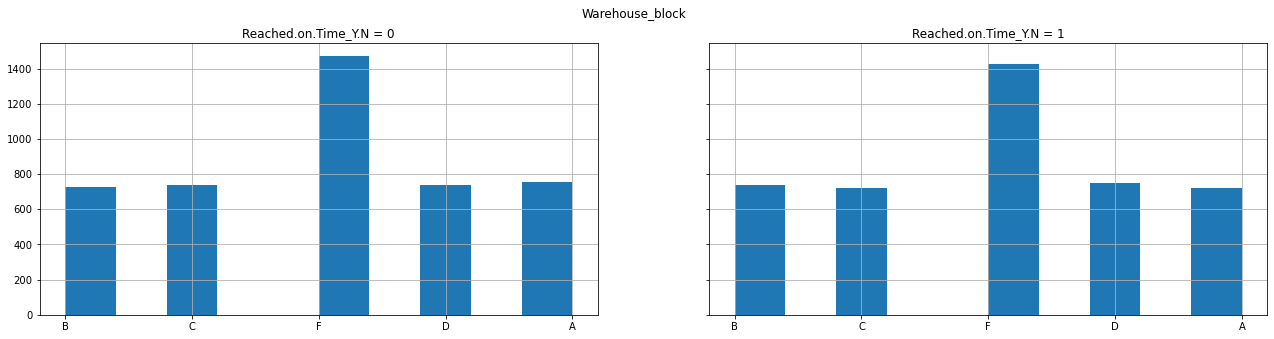

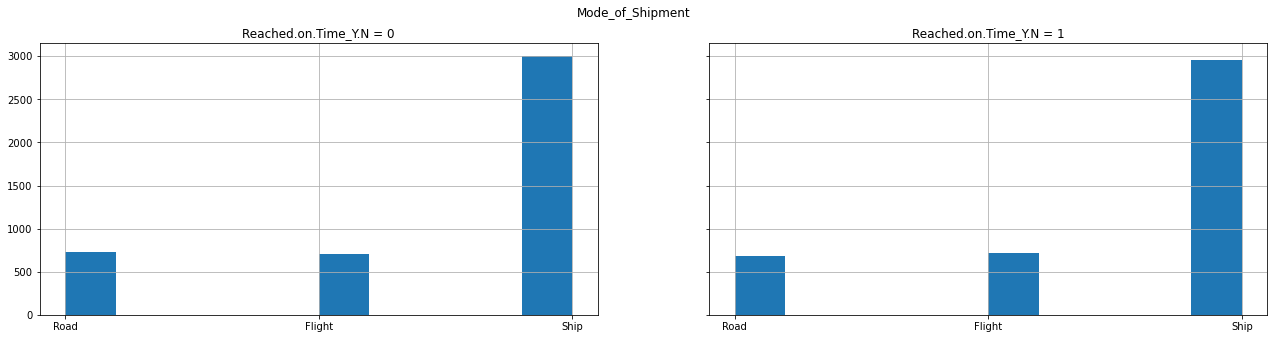

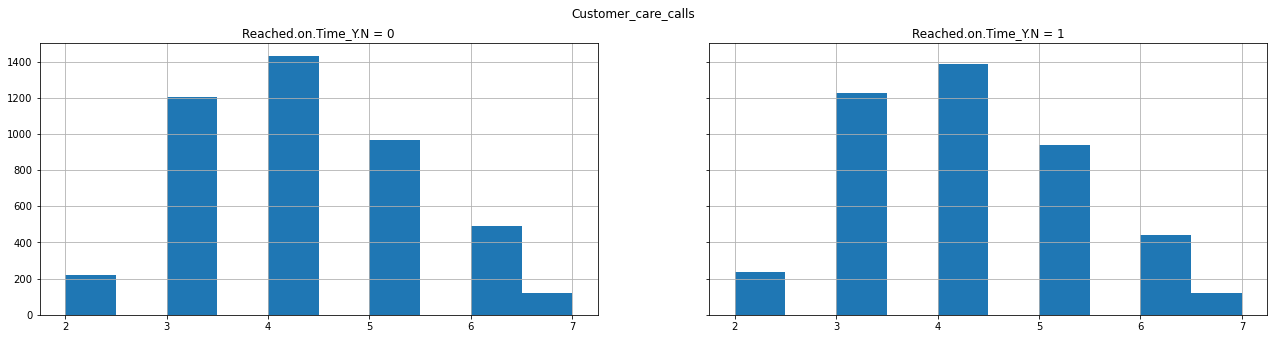

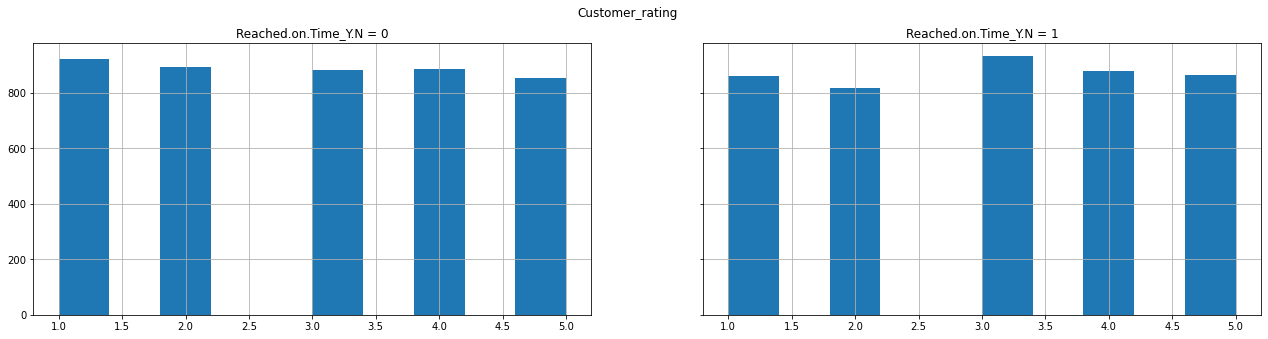

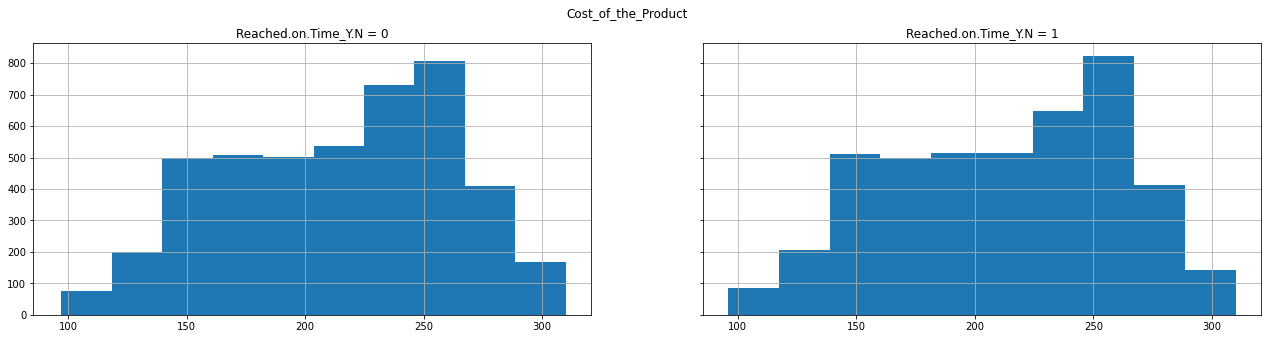

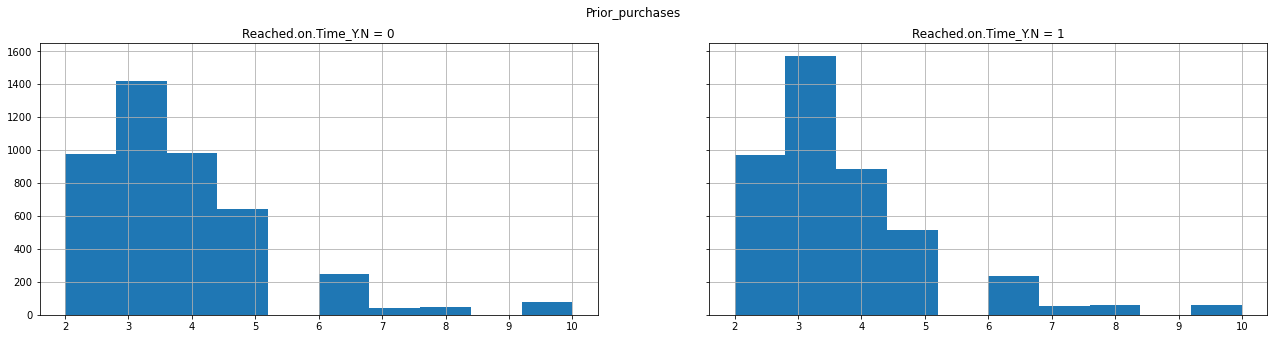

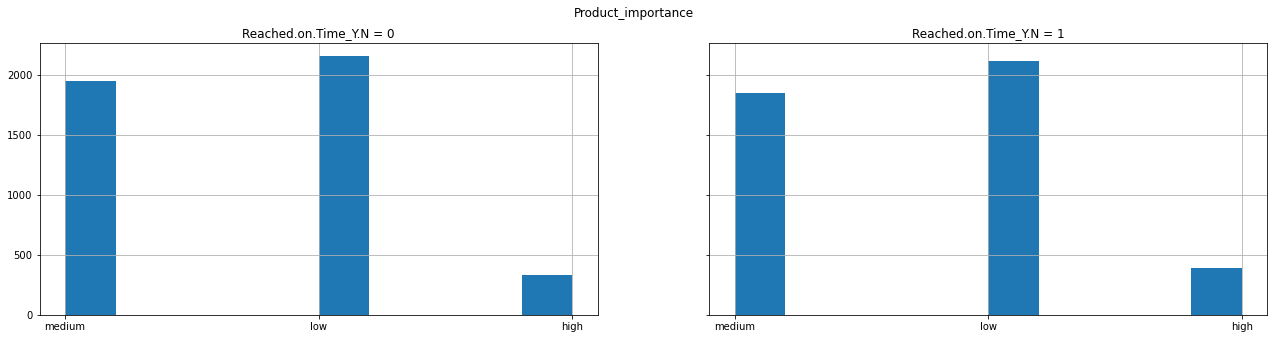

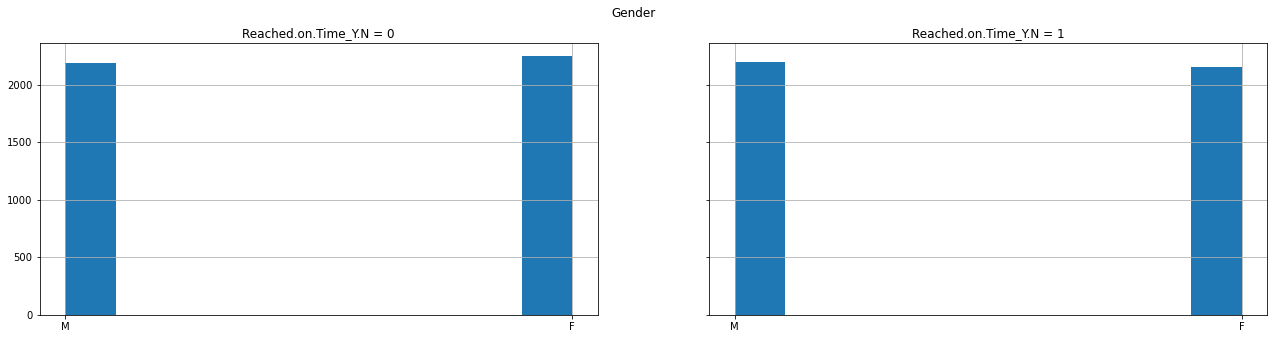

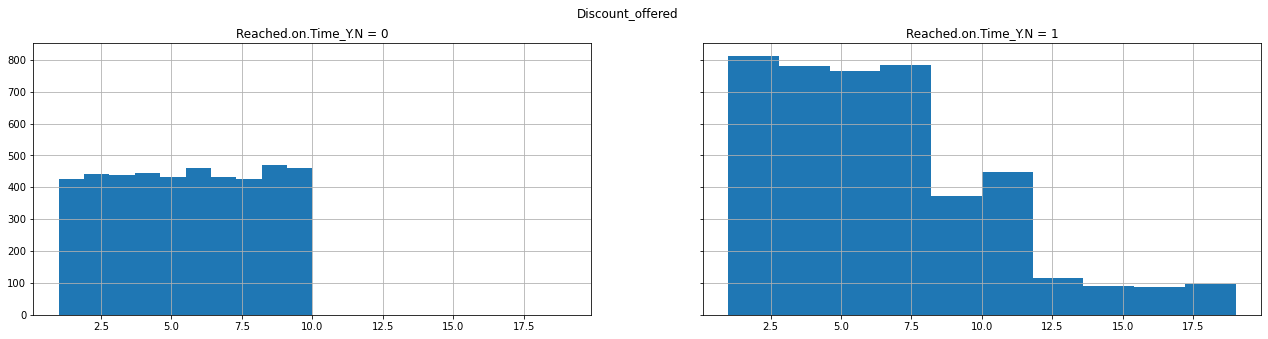

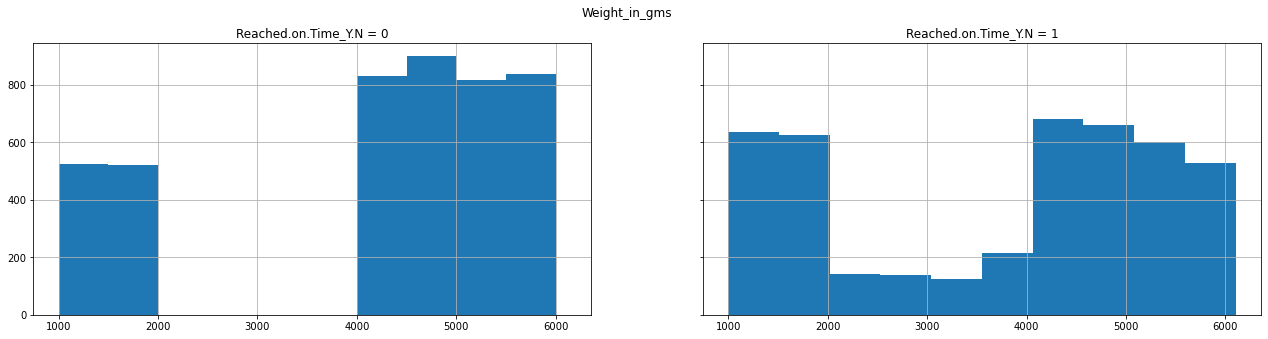

In [8]:
for i in other_feature:
    makehist_countft_bytg(target_feature,i,target_range,data)

### Correlation

### Change Categorical data

In [10]:
from sklearn.preprocessing import LabelEncoder

In [11]:
label_encoder = LabelEncoder()
cateogical_feature_name = ['Warehouse_block', 'Mode_of_Shipment', 'Product_importance', 'Gender']
for feature_name in cateogical_feature_name:
    data[feature_name] = label_encoder.fit_transform(data[feature_name])
data

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
3,4,1,0,3,3,176,4,2,1,10,1177,1
5,6,4,0,3,1,162,3,2,0,12,1417,1
6,7,3,0,3,4,250,3,1,0,3,2371,1
8,9,0,0,3,4,150,3,1,0,11,1861,1
10,11,2,0,3,4,189,2,2,1,12,2888,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10994,10995,0,2,4,1,252,5,2,0,1,1538,1
10995,10996,1,2,4,1,232,5,2,0,6,1247,0
10996,10997,2,2,5,4,242,5,1,0,4,1155,0
10997,10998,4,2,5,2,223,6,2,1,2,1210,0


# Scailing def (Modified)

In [12]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

In [13]:
#drop not using features
drop_f = ['Warehouse_block', 'Mode_of_Shipment', 'Customer_care_calls', 'Gender']
data = data.drop(drop_f, axis=1)

In [14]:
y = data[target_feature]
X = data.drop(target_feature, axis=1)

In [15]:
#test data split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [16]:
X_train

,ID,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Discount_offered,Weight_in_gms
9178,9179,3,267,5,2,9,1538
6899,6900,5,196,4,1,10,1694
3135,3136,5,141,3,2,8,5031
7872,7873,1,224,3,1,8,4908
4679,4680,5,205,3,2,9,4411
...,...,...,...,...,...,...,...
7943,7944,5,173,4,1,7,4978
7400,7401,4,177,4,2,5,1854
7599,7600,3,245,4,1,1,5743
2945,2946,2,212,3,2,9,2521


In [17]:
# def : scaling data using Standard, minmax, robust
# input : target of scaling feature
# return : dataframe after scaling
def Scaling(X_train, X_test):
    std_Scaler = preprocessing.StandardScaler()
    scaled_train = pd.DataFrame(std_Scaler.fit_transform(X_train))
    scaled_test = pd.DataFrame(std_Scaler.transform(X_test))
    
    mam_Scaler = preprocessing.MinMaxScaler()
    scaled_train_m = pd.DataFrame(mam_Scaler.fit_transform(X_train))
    scaled_test_m = pd.DataFrame(mam_Scaler.transform(X_test))
    
    rb_Scaler = preprocessing.RobustScaler()
    scaled_train_r = pd.DataFrame(rb_Scaler.fit_transform(X_train))
    scaled_test_r = pd.DataFrame(rb_Scaler.transform(X_test))
    
    return scaled_train, scaled_test, scaled_train_m, scaled_test_m, scaled_train_r, scaled_test_r

In [18]:
std_X_train, std_X_test, mm_X_train, mm_X_test, r_X_train, r_X_test = Scaling(X_train, X_test)

In [19]:
std_X_test

,0,1,2,3,4,5,6
0,-0.134705,0.005068,-1.160236,-0.418373,-2.151615,-0.271507,1.008227
1,1.484640,0.715631,-1.201757,-1.075210,-0.557395,-0.271507,0.770195
2,-2.118751,-0.705495,0.189216,-0.418373,1.036825,0.012945,-1.134678
3,0.210203,-1.416058,-0.973388,-1.075210,-0.557395,-1.409316,1.098876
4,-0.769541,0.005068,0.521389,-0.418373,-2.151615,-1.409316,1.198159
...,...,...,...,...,...,...,...
2896,0.700625,-1.416058,0.666715,-1.075210,-0.557395,0.866302,0.604312
2897,-1.054338,0.715631,-0.184478,0.238465,-0.557395,0.012945,0.676462
2898,1.147429,-0.705495,-0.454369,2.208976,1.036825,-1.124864,0.048082
2899,0.309900,-1.416058,1.019648,-1.075210,-0.557395,-0.271507,0.026499


# Decision tree - gini

In [20]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.model_selection import RandomizedSearchCV

In [21]:
# make & print decision tree
def decision_tree_gini(X_train, y_train, X_test, y_test):
    X_train = X_train.to_numpy()
    X_test = X_test.to_numpy()
    y_train = y_train.to_numpy().reshape(-1, 1)
    y_test = y_test.to_numpy().reshape(-1, 1)
    
    # Random Search
    decision = DecisionTreeClassifier(criterion='gini')
    clf = RandomizedSearchCV(decision, {'max_depth': range(2,12)})
    clf = clf.fit(X_train, y_train)
    
    #print test score
    print('test score:', clf.score(X_test, y_test))
    
    #print tree
    plot_tree(clf.best_estimator_)

test score: 0.6273698724577732


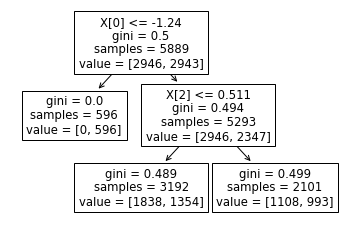

In [22]:
# use standard scaled data
decision_tree_gini(std_X_train, y_train, std_X_test, y_test)

test score: 0.6273698724577732


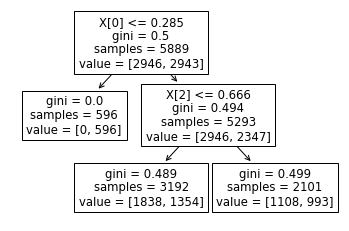

In [23]:
# use minmax scaled data
decision_tree_gini(mm_X_train, y_train, mm_X_test, y_test)

test score: 0.6273698724577732


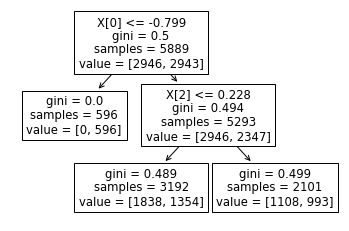

In [24]:
# use robust scaled data
decision_tree_gini(r_X_train, y_train, r_X_test, y_test)

# Random forest test

In [25]:
from sklearn.ensemble import RandomForestClassifier
# make & print random froest classifier
def random_forest(X_train, y_train, X_test, y_test):    
    # Random Search
    rf = RandomForestClassifier()
    clf = RandomizedSearchCV(rf, {'max_depth': range(2,12)})
    clf = clf.fit(X_train, y_train)
    
    #print test score
    print('test score:', clf.score(X_test, y_test))

In [26]:
random_forest(std_X_train, y_train, std_X_test, y_test)

test score: 0.6256463288521199
